In [1]:
import numpy
import numpy as np
import pandas
import cv2
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

/home/vishay/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# load dataset
images = []
labels = []
from imutils import paths
for imagePath in paths.list_images("/home/vishay/Downloads/tipr-second-assignment-master/data/MNIST"):
    images.append(cv2.imread(imagePath,0).flatten())
    labels.append(imagePath.split('/')[-2])
images = np.array(images)
labels = np.array(labels,dtype = int)  

In [3]:
dummy_y = np_utils.to_categorical(labels)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, dummy_y, test_size=0.33, random_state=42)

In [6]:
def build_model():
    global hidden_layer_sizes
    model = Sequential()

    model.add(Dense(hidden_layer_sizes[0], input_dim=784))
    model.add(Activation('relu'))

    for layer_size in hidden_layer_sizes[1:]:
        model.add(Dense(layer_size))
        model.add(Activation('relu'))

    model.add(Dense(10))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [30]:
units = [32,64,100,128,256,512,1028] 

In [28]:
units = [32,64]+units

In [18]:
accuracy = []
f1micro = []
f1macro = []
for i in units:
    hidden_layer_sizes = [i]*5
               
    estimator = KerasClassifier(build_fn=build_model, epochs=3, batch_size=50, verbose=1)
    estimator.fit(X_train,y_train)
    s = estimator.predict(X_test)
    label = [np.argmax(y_test[i,:]) for i in range(len(y_test))]
    label = np.array(label)
    total = 0
    correct = 0
    for i in range(len(s)):
        total += 1
        if s[i] == label[i]:
            correct += 1
    acc = correct/total

    f1mi = f1_score(label, s, average='macro',labels=np.unique(s))  
    f1ma = f1_score(label, s, average='micro',labels=np.unique(s)) 
    
    accuracy.append(acc)
    f1micro.append(f1mi)
    f1macro.append(f1ma)


Epoch 1/3
28140/28140 [==============================] - 1s 47us/step - loss: 1.7926 - acc: 0.7022
Epoch 2/3
28140/28140 [==============================] - 1s 35us/step - loss: 0.4161 - acc: 0.8792
Epoch 3/3
13860/13860 [==============================] - 0s 20us/step
Epoch 1/3
28140/28140 [==============================] - 2s 63us/step - loss: 1.2533 - acc: 0.7764
Epoch 2/3
28140/28140 [==============================] - 1s 48us/step - loss: 0.2805 - acc: 0.9189
Epoch 3/3
13860/13860 [==============================] - 0s 23us/step


In [11]:
acc1 = accuracy

In [12]:
fma = f1macro

In [13]:
fmi = f1micro

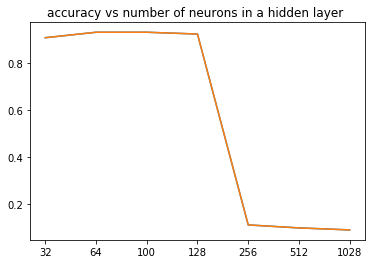

In [37]:
plt.plot(range(7),acc)

plt.title("accuracy vs number of neurons in a hidden layer ")
x = np.array(range(7))
y = np.array(acc)
plt.xticks(x, units)
plt.plot(x, y)
plt.show()

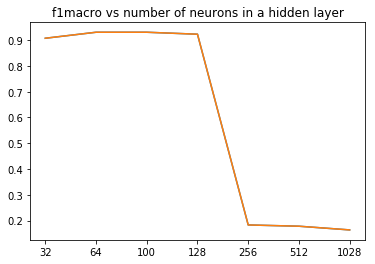

In [38]:
plt.plot(range(7),fmac)

plt.title("f1macro vs number of neurons in a hidden layer")
x = np.array(range(7))
y = np.array(fmac)
plt.xticks(x, units)

plt.plot(x, y)
plt.show()

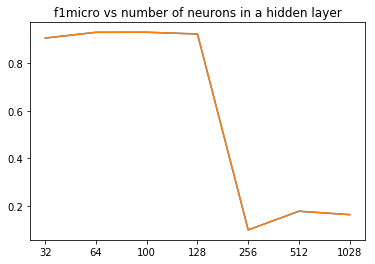

In [39]:
plt.plot(range(7),fmic)

plt.title("f1micro vs number of neurons in a hidden layer")
x = np.array(range(7))
y = np.array(fmic)
plt.xticks(x, units)

plt.plot(x, y)
plt.show()

In [34]:
fmic

[0.9057779049786985,
 0.9299775973712998,
 0.9302122924497132,
 0.9228331821222155,
 0.09942166482552472,
 0.17799395293808334,
 0.1636303411725737]

In [35]:
fmac

[0.9073593073593074,
 0.9306637806637806,
 0.9306637806637806,
 0.9230158730158731,
 0.18290496114763896,
 0.17799395293808334,
 0.1636303411725737]

In [36]:
acc

[0.9073593073593074,
 0.9306637806637806,
 0.9306637806637806,
 0.9230158730158731,
 0.11038961038961038,
 0.09769119769119769,
 0.0891053391053391]